<a href="https://colab.research.google.com/github/emilymikeska1/EECS731_Project4/blob/main/Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mlb_elo.csv')
df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/mlb_elo_latest.csv')

Combined the two dataframes

In [3]:
df1.append(df2)

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-08,2020,0,d,TBD,NYY,1566.075394,1557.931446,0.561368,0.438632,NaN,NaN,1562.032965,1562.805994,NaN,NaN,NaN,NaN,NaN,NaN,0.546260,0.453740,NaN,NaN,NaN,NaN
1,2020-10-08,2020,0,d,OAK,HOU,1547.618027,1542.711978,0.555239,0.444761,NaN,NaN,1532.981409,1552.953477,NaN,NaN,NaN,NaN,NaN,NaN,0.501299,0.498701,NaN,NaN,NaN,NaN
2,2020-10-07,2020,0,d,NYY,TBD,1557.931446,1566.075394,0.530387,0.469613,NaN,NaN,1562.805994,1562.032965,NaN,NaN,NaN,NaN,NaN,NaN,0.490450,0.509550,NaN,NaN,NaN,NaN
3,2020-10-07,2020,0,d,HOU,OAK,1542.711978,1547.618027,0.536572,0.463428,NaN,NaN,1552.953477,1532.981409,NaN,NaN,NaN,NaN,NaN,NaN,0.535483,0.464517,NaN,NaN,NaN,NaN
4,2020-10-06,2020,0,d,NYY,TBD,1557.931446,1566.075394,0.530387,0.469613,NaN,NaN,1562.805994,1562.032965,NaN,NaN,NaN,NaN,NaN,NaN,0.490450,0.509550,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922,2020-07-24,2020,0,NaN,TBD,TOR,1537.750707,1487.408999,0.605383,0.394617,1535.385176,1489.774530,1539.417329,1478.540428,Charlie Morton,Hyun-Jin Ryu,59.143800,56.199388,21.387997,22.869271,0.602440,0.397560,1537.654179,1480.303579,4.0,6.0
923,2020-07-24,2020,0,NaN,CIN,DET,1490.427814,1420.458239,0.632029,0.367971,1492.616909,1418.269144,1521.707154,1436.198577,Sonny Gray,Matthew Boyd,58.879686,49.587500,25.182845,2.579873,0.665662,0.334338,1523.137206,1434.768526,7.0,1.0
924,2020-07-24,2020,0,NaN,NYM,ATL,1521.484830,1528.909097,0.523836,0.476164,1522.802537,1527.591390,1529.122226,1528.008772,Jacob deGrom,Mike Soroka,64.418447,55.793568,53.729606,22.737531,0.563735,0.436265,1530.004769,1527.126229,1.0,0.0
925,2020-07-23,2020,0,NaN,LAD,SFG,1561.949414,1487.819917,0.637581,0.362419,1564.351941,1485.417390,1584.386566,1453.743200,Dustin May,Johnny Cueto,48.700313,49.333010,-16.907113,1.884300,0.670766,0.329234,1585.954334,1452.175432,8.0,1.0


In [4]:
df1.head()

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1,pitcher2,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2
0,2020-10-08,2020,0,d,TBD,NYY,1566.075394,1557.931446,0.561368,0.438632,NaN,NaN,1562.032965,1562.805994,NaN,NaN,NaN,NaN,NaN,NaN,0.546260,0.453740,NaN,NaN,NaN,NaN
1,2020-10-08,2020,0,d,OAK,HOU,1547.618027,1542.711978,0.555239,0.444761,NaN,NaN,1532.981409,1552.953477,NaN,NaN,NaN,NaN,NaN,NaN,0.501299,0.498701,NaN,NaN,NaN,NaN
2,2020-10-07,2020,0,d,NYY,TBD,1557.931446,1566.075394,0.530387,0.469613,NaN,NaN,1562.805994,1562.032965,NaN,NaN,NaN,NaN,NaN,NaN,0.490450,0.509550,NaN,NaN,NaN,NaN
3,2020-10-07,2020,0,d,HOU,OAK,1542.711978,1547.618027,0.536572,0.463428,NaN,NaN,1552.953477,1532.981409,NaN,NaN,NaN,NaN,NaN,NaN,0.535483,0.464517,NaN,NaN,NaN,NaN
4,2020-10-06,2020,0,d,NYY,TBD,1557.931446,1566.075394,0.530387,0.469613,NaN,NaN,1562.805994,1562.032965,NaN,NaN,NaN,NaN,NaN,NaN,0.490450,0.509550,NaN,NaN,NaN,NaN


In [5]:
df1.dtypes

date             object
season            int64
neutral           int64
playoff          object
team1            object
team2            object
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1         object
pitcher2         object
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1          float64
score2          float64
dtype: object

In [6]:
df1.shape

(220937, 26)

Data preprocessesing included changing the 'date' column to a more usable format, removing several features, filling empty cells with 0, removing rows that are missing a score from either team1 or team2, creating a new feature called 'score_diff', and One Hot Encoding the features team1 and team2.

In [7]:
df1['date']=df1['date'].astype('datetime64[ns]')
df1['date']=df1['date'].values.astype('float64')
df1=df1.drop(df1[['playoff','neutral','pitcher1','pitcher2']], axis=1)

In [8]:
df1.dtypes

date            float64
season            int64
team1            object
team2            object
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1          float64
score2          float64
dtype: object

In [9]:
#df1['pitcher1'].fillna('O', inplace=True)
#df1['pitcher2'].fillna('O', inplace=True)
df1['elo1_post'].fillna(0, inplace=True)
df1['elo2_post'].fillna(0, inplace=True)
df1['pitcher1_rgs'].fillna(0, inplace=True)
df1['pitcher2_rgs'].fillna(0, inplace=True)
df1['pitcher1_adj'].fillna(0, inplace=True)
df1['pitcher2_adj'].fillna(0, inplace=True)
df1['rating1_post'].fillna(0, inplace=True)
df1['rating2_post'].fillna(0, inplace=True)

In [10]:
df1=df1[df1['score1'].notna()]
df1=df1[df1['score2'].notna()]
#df1=df1[df1['pitcher1'].notna()]
#df1=df1[df1['pitcher2'].notna()]

In [11]:
score_diff=df1['score1']-df1['score2']
score_diff=abs(score_diff)
df1['score_diff']=score_diff

In [12]:
df1.shape

(220924, 23)

In [13]:
df1.isnull().any()

date            False
season          False
team1           False
team2           False
elo1_pre        False
elo2_pre        False
elo_prob1       False
elo_prob2       False
elo1_post       False
elo2_post       False
rating1_pre     False
rating2_pre     False
pitcher1_rgs    False
pitcher2_rgs    False
pitcher1_adj    False
pitcher2_adj    False
rating_prob1    False
rating_prob2    False
rating1_post    False
rating2_post    False
score1          False
score2          False
score_diff      False
dtype: bool

In [14]:
df1.dtypes

date            float64
season            int64
team1            object
team2            object
elo1_pre        float64
elo2_pre        float64
elo_prob1       float64
elo_prob2       float64
elo1_post       float64
elo2_post       float64
rating1_pre     float64
rating2_pre     float64
pitcher1_rgs    float64
pitcher2_rgs    float64
pitcher1_adj    float64
pitcher2_adj    float64
rating_prob1    float64
rating_prob2    float64
rating1_post    float64
rating2_post    float64
score1          float64
score2          float64
score_diff      float64
dtype: object

Took only the first 10000 rows to encode and train the models.

In [15]:
df1=df1.sample(frac=1)
df=df1.head(10000)

In [16]:
team1_enc=pd.get_dummies(df['team1'])
df=df.drop('team1', axis=1)
df=df.join(team1_enc)

In [17]:
team2_enc=pd.get_dummies(df['team2'])
df=df.drop('team2', axis=1)
df=df.merge(team2_enc)

Removed features 'pitcher1' and 'pitcher2' because the encoding was taking too much memory and crashing google colab.


In [18]:
#pitcher1_enc=pd.get_dummies(df['pitcher1'])
#df=df.drop('pitcher1', axis=1)
#df=df.join(pitcher1_enc)

In [19]:
#pitcher2_enc=pd.get_dummies(df['pitcher2'])
#df=df.merge(pitcher2_enc)
#df=df.drop('pitcher2', axis=1)

In [18]:
df.head()

,date,season,elo1_pre,elo2_pre,elo_prob1,elo_prob2,elo1_post,elo2_post,rating1_pre,rating2_pre,pitcher1_rgs,pitcher2_rgs,pitcher1_adj,pitcher2_adj,rating_prob1,rating_prob2,rating1_post,rating2_post,score1,score2,score_diff,ANA,ARI,ATL,BAL,BFN,BL1,BL2,BOS,BR1,BR2,BR4,BSP,CHC,CHW,CIN,CL1,CL2,CL3,CL5,...,NY4,NYM,NYY,OAK,PH1,PH2,PH3,PH4,PHI,PHP,PIT,PRO,RC2,RIC,SDP,SEA,SFG,SL2,SLU,SR1,SR2,STL,TBD,TEX,TL1,TL2,TOR,TRN,TRO,WOR,WS3,WS6,WS7,WS8,WS9,WSN,BL4,ELI,MID,RC1
0,1.146442e+18,2006,1505.397,1460.054,0.598488,0.401512,1506.422,1459.029,1504.621,1461.142,48.792,44.662,8.628522,6.883713,0.599101,0.400899,1505.631,1460.131,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.146442e+18,2006,1505.397,1460.054,0.598488,0.401512,1506.422,1459.029,1504.621,1461.142,48.792,44.662,8.628522,6.883713,0.599101,0.400899,1505.631,1460.131,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.146442e+18,2006,1505.397,1460.054,0.598488,0.401512,1506.422,1459.029,1504.621,1461.142,48.792,44.662,8.628522,6.883713,0.599101,0.400899,1505.631,1460.131,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.146442e+18,2006,1505.397,1460.054,0.598488,0.401512,1506.422,1459.029,1504.621,1461.142,48.792,44.662,8.628522,6.883713,0.599101,0.400899,1505.631,1460.131,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.146442e+18,2006,1505.397,1460.054,0.598488,0.401512,1506.422,1459.029,1504.621,1461.142,48.792,44.662,8.628522,6.883713,0.599101,0.400899,1505.631,1460.131,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df.dtypes

date         float64
season         int64
elo1_pre     float64
elo2_pre     float64
elo_prob1    float64
              ...   
WSN            uint8
BL4            uint8
ELI            uint8
MID            uint8
RC1            uint8
Length: 106, dtype: object

Defined X and y, created the training and testing set, trained models, predicted values, and cross validated models. 

In [20]:
X=df.drop(df[['score1','score2']], axis=1)
y=df[['score1']]

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
reg=RandomForestRegressor()
reg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred=reg.predict(X_test)
reg_mse=mse(y_test, y_pred)
print(y_pred)
print(reg_mse)

[ 8.  6.  3. ...  2. 11.  7.]
4.577917505502447e-05


I tried to do cross validation, but it required too much memory and crashed.

In [26]:
#cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#n_scores=cross_val_score(reg, X, y, scoring='neg_mean_absolute_error', cv=cv, error_score='raise')
#n_scores=absolute(n_scores)
#print('Result: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

In [24]:
gbr=GradientBoostingRegressor()
gbr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
gbr_ypred=gbr.predict(X_test)
gbr_mse=mse(y_test, gbr_ypred)
print(gbr_ypred)
print(gbr_mse)

[3.77492864 6.30982047 3.73537952 ... 3.98355089 6.10129098 5.99742416]
6.121892743836599


Text(0.5, 1.0, 'Feature Importance')

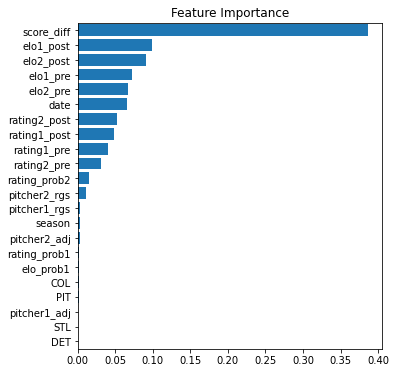

In [77]:
columns=X.columns
feature_importance=gbr.feature_importances_
sorted_idx=np.argsort(feature_importance)
pos=np.arange(sorted_idx.shape[0]) +0.5
fig=plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.barh(pos, feature_importance[sorted_idx],align='center')
plt.yticks(pos, np.array(columns)[sorted_idx])
plt.ylim(80,102)
plt.title('Feature Importance')

In [ ]:
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores=cross_val_score(gbr, X, y, scoring='neg_mean_absolute_error', cv=cv, error_score='raise')
n_scores=absolute(n_scores)
print('Result: %.3f (%.3f)' % (mean(n_scores), std(n_scores))) 

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


I also attemped sklearn's MultiOutputRegressor, but it crashed google colab...

In [ ]:
mor=MultiOutputRegressor(LinearRegression).fit(X_train, y_train)
mor_ypred=mor.predict(X_test)
mor_mse=mse(y_test, mor_ypred)
print(mor_ypred)
print(mor_mse)